## TASK #2: To Explore Supervised Machine Learning 

### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing important libraries required in the notebook

In [2]:
import numpy as np
import pandas as pd


### Reading data from the given link 

In [3]:
url = "http://bit.ly/w-data"

data=pd.read_csv(url)
print('data imported successfully')

data.head(10)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
# checking decriptive statistics of our data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#checking shape ,dimension and info of our data
display(data.shape,  data.ndim,  data.info)


(25, 2)

2

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [9]:
#checking missing or NA values in our data
print(data.isna().sum(axis=0))


Hours     0
Scores    0
dtype: int64
Hours     0
Scores    0
dtype: int64


### Data Visualization

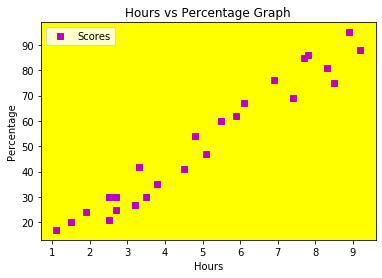

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

vis=data.plot(x='Hours',y='Scores',style='ms')
vis.set_facecolor('yellow')
plt.title('Hours vs Percentage Graph')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Data Preparation
the next step is to divide data into 'attributes'(input) and 'labels' (output)

In [30]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

print('splitting of dataset into test and train is completed')


splitting of dataset into test and train is completed


### Data Modelling 
WE have split our data into training and testing sets, and now it's time to train our model

In [31]:
from sklearn.linear_model import LinearRegression

my_model=LinearRegression()
my_model.fit(x_train,y_train)

print('successfully trained')


successfully trained


### Plotting the Regression Line 

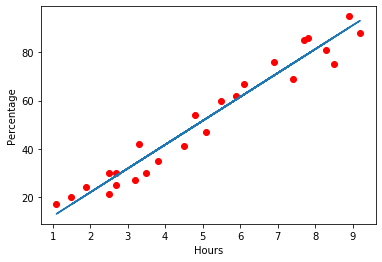

In [32]:
import sklearn.linear_model
reg_line = my_model.coef_*x+my_model.intercept_


# Plotting for the test data
re= plt.scatter(x, y)
re.set_facecolor('red')

plt.plot(x, reg_line)
plt.xlabel('Hours')
plt.ylabel('Percentage')

plt.show()


### Data Prediction 
After traininig our algorithm , now it's time to predict our data

In [36]:
print('data to test',x_test) # Testing data - In Hours
pred_data = my_model.predict(x_test) # Predicting the scores


print( pred_data)

data to test [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [37]:
#comparing the actual and predicted data
df=pd.DataFrame({'Actual': y_test, 'Predicted': pred_data})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing Our Own Data

In [38]:
hour_studied= [[9.25]]
own_pred = my_model.predict(hour_studied)
print("No of Hours = {}".format(hour_studied))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, pred_data)) 

Mean Absolute Error: 4.183859899002975
